# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from missingpy import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Import data

In [2]:
data = pd.read_csv('processed_data.csv')

In [3]:
X = data.loc[:,'Mall A':'Occupancy>21'].values
Y = data['Parking Duration'].values

# Split data into training and validation set

In [4]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)

# Perform imputation on input features using standard imputation algorithms

<b>KNN</b>: Performs nearest neighbour imputation by weighting K samples using the mean squared difference on features for which there is observed data.

In [5]:
knn = KNNImputer(n_neighbors=5, row_max_missing=1.0, col_max_missing=1.0)
X_knn_train = knn.fit_transform(Xtrain)
X_knn_test = knn.transform(Xtest)

/Users/raymondlow/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
/Users/raymondlow/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
/Users/raymondlow/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
/Users/raymondlow/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be r

<b>IterativeImputer (MICE)</b>: A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

In [6]:
ii = IterativeImputer(max_iter=10)
X_ii_train = ii.fit_transform(Xtrain)
X_ii_test = ii.transform(Xtest)

/Users/raymondlow/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


# Remove input features that exceed a certain missing rate

In [7]:
# set a cutoff value such that any input feature with a missing rate greater than this value will be dropped.
cutoff_value = 1.0

original_data = pd.read_csv('data.csv')
dropped_columns = ['Day Of Week','Vehicle Reg No','Parking Duration','Place Type','Entry Month','Entry Day','Entry Year','Source']
original_data.drop(columns=dropped_columns, inplace=True)
missing_rate = original_data.isnull().sum()/len(original_data)

In [8]:
missing_rate

Mall                   0.000000
Entry Hour             0.000000
Parking Location       0.002413
Vehicle Type           0.050676
Activity               0.424228
Refrigerated           0.173745
Commodity              0.527510
Payload(%)             0.455598
Initial Payload(%)     0.737452
Delivery Volume(m3)    0.472973
Pickup Volume(m3)      0.549710
Single/Bundle          0.052606
No of Workers          0.562741
Store Count            0.653958
Mall Count             0.934363
Employer               0.638514
No of Tours            0.839286
No of Stops/Tour       0.980212
Is Service Vehicle     0.973938
System Occupancy       0.233108
dtype: float64

In [9]:
dropped_features = []
for i in range(len(missing_rate)):
    if missing_rate[i] > cutoff_value:
        dropped_features.append(missing_rate.keys()[i])

remaining_features_unordered = list(set(missing_rate.keys()) - set(dropped_features))
remaining_features = [feature for feature in missing_rate.keys() if feature in remaining_features_unordered]

print('Original list of input features:')
print(list(missing_rate.keys()))
print()
print('Input features that will be dropped:')
print(dropped_features)
print()
print('Final list of input features:')
print(remaining_features)

remaining_columns = []
if 'Mall' in remaining_features:
    remaining_columns.extend([0,1,2,3,4,5,6,7,8])
if 'Entry Hour' in remaining_features:
    remaining_columns.extend([9,10,11,12,13,14,15,16,17,18,19,20,21,22])
if 'Parking Location' in remaining_features:
    remaining_columns.extend([23,24,25])
if 'Vehicle Type' in remaining_features:
    remaining_columns.extend([26,27])
if 'Activity' in remaining_features:
    remaining_columns.extend([28,29,30,31])
if 'Refrigerated' in remaining_features:
    remaining_columns.extend([32,33])
if 'Commodity' in remaining_features:
    remaining_columns.extend([34,35,36,37,38,39,40,41,42,43,44,45,46,47,48])
if 'Payload(%)' in remaining_features:
    remaining_columns.extend([49,50,51,52])
if 'Initial Payload(%)' in remaining_features:
    remaining_columns.extend([53,54,55,56])
if 'Delivery Volume(m3)' in remaining_features:
    remaining_columns.extend([57,58,59,60])
if 'Pickup Volume(m3)' in remaining_features:
    remaining_columns.extend([61,62,63,64])
if 'Single/Bundle' in remaining_features:
    remaining_columns.extend([65])
if 'No of Workers' in remaining_features:
    remaining_columns.extend([66,67,68])
if 'Store Count' in remaining_features:
    remaining_columns.extend([69,70])
if 'Mall Count' in remaining_features:
    remaining_columns.extend([71,72,73,74])
if 'Employer' in remaining_features:
    remaining_columns.extend([75,76,77,78,79,80])
if 'No of Tours' in remaining_features:
    remaining_columns.extend([81,82,83])
if 'Is Service Vehicle' in remaining_features:
    remaining_columns.extend([84])
if 'No of Stops/Tour' in remaining_features:
    remaining_columns.extend([85,86,87,88])
if 'System Occupancy' in remaining_features:
    remaining_columns.extend([89,90,91,92])

Original list of input features:
['Mall', 'Entry Hour', 'Parking Location', 'Vehicle Type', 'Activity', 'Refrigerated', 'Commodity', 'Payload(%)', 'Initial Payload(%)', 'Delivery Volume(m3)', 'Pickup Volume(m3)', 'Single/Bundle', 'No of Workers', 'Store Count', 'Mall Count', 'Employer', 'No of Tours', 'No of Stops/Tour', 'Is Service Vehicle', 'System Occupancy']

Input features that will be dropped:
[]

Final list of input features:
['Mall', 'Entry Hour', 'Parking Location', 'Vehicle Type', 'Activity', 'Refrigerated', 'Commodity', 'Payload(%)', 'Initial Payload(%)', 'Delivery Volume(m3)', 'Pickup Volume(m3)', 'Single/Bundle', 'No of Workers', 'Store Count', 'Mall Count', 'Employer', 'No of Tours', 'No of Stops/Tour', 'Is Service Vehicle', 'System Occupancy']


In [10]:
# Filter out the remaining features using their corresponding column index
X_knn_train = X_knn_train[:,remaining_columns]
X_knn_test = X_knn_test[:,remaining_columns]

X_ii_train = X_ii_train[:,remaining_columns]
X_ii_test = X_ii_test[:,remaining_columns]

# Train parking duration regression model using imputed data and perform hyperparameter tuning

In [11]:
grid_params = {'n_estimators': [10,20,30,40,50,60,70],
               'min_samples_leaf': [1,2,3],
               'max_depth': [2,3,4,5]}

In [12]:
# gb_knn = GradientBoostingRegressor(n_estimators=n_estimators).fit(X_knn_train, Y_train)
gb_knn = GridSearchCV(GradientBoostingRegressor(), cv=5, verbose=2, param_grid=grid_params, scoring='neg_mean_absolute_error', n_jobs=-1)
gb_knn.fit(X_knn_train, Ytrain)
print(gb_knn.best_params_)

Y_knn_predict = gb_knn.predict(X_knn_test)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] max_depth=2, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=20, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_dept

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . max_depth=2, min_samples_leaf=1, n_estimators=20, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=20, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=20, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=30 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=30, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=30 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=30, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=30 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=30, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=30 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=30, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=30 ................
[CV] .

[CV] . max_depth=2, min_samples_leaf=2, n_estimators=70, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, n_estimators=70 ................
[CV] . max_depth=2, min_samples_leaf=2, n_estimators=70, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, n_estimators=70 ................
[CV] . max_depth=2, min_samples_leaf=2, n_estimators=70, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, n_estimators=70 ................
[CV] . max_depth=2, min_samples_leaf=2, n_estimators=70, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, n_estimators=10 ................
[CV] . max_depth=2, min_samples_leaf=3, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=3, n_estimators=10 ................
[CV] . max_depth=2, min_samples_leaf=3, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=3, n_estimators=10 ................
[CV] . max_depth=2, min_samples_leaf=3, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=3, n_estimators=10 ................
[CV] .

[CV] . max_depth=3, min_samples_leaf=1, n_estimators=40, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=50 ................
[CV] . max_depth=3, min_samples_leaf=1, n_estimators=50, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=50 ................
[CV] . max_depth=3, min_samples_leaf=1, n_estimators=50, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=50 ................
[CV] . max_depth=3, min_samples_leaf=1, n_estimators=50, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=50 ................
[CV] . max_depth=3, min_samples_leaf=1, n_estimators=50, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=50 ................
[CV] . max_depth=3, min_samples_leaf=1, n_estimators=50, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=60 ................
[CV] . max_depth=3, min_samples_leaf=1, n_estimators=60, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=60 ................
[CV] .

[CV] . max_depth=3, min_samples_leaf=3, n_estimators=30, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, n_estimators=30 ................
[CV] . max_depth=3, min_samples_leaf=3, n_estimators=30, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, n_estimators=30 ................
[CV] . max_depth=3, min_samples_leaf=3, n_estimators=30, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, n_estimators=30 ................
[CV] . max_depth=3, min_samples_leaf=3, n_estimators=30, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, n_estimators=30 ................
[CV] . max_depth=3, min_samples_leaf=3, n_estimators=30, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, n_estimators=40 ................
[CV] . max_depth=3, min_samples_leaf=3, n_estimators=40, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, n_estimators=40 ................
[CV] . max_depth=3, min_samples_leaf=3, n_estimators=40, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, n_estimators=40 ................
[CV] .

[CV] . max_depth=4, min_samples_leaf=1, n_estimators=70, total=   0.2s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=70 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=70, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=10 ................
[CV] . max_depth=4, min_samples_leaf=2, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=10 ................
[CV] . max_depth=4, min_samples_leaf=2, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=10 ................
[CV] . max_depth=4, min_samples_leaf=2, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=10 ................
[CV] . max_depth=4, min_samples_leaf=2, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=10 ................
[CV] . max_depth=4, min_samples_leaf=2, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=20 ................
[CV] .

[CV] . max_depth=4, min_samples_leaf=3, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=3, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=3, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=3, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=60 ................
[CV] . max_depth=4, min_samples_leaf=3, n_estimators=60, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=60 ................
[CV] . max_depth=4, min_samples_leaf=3, n_estimators=60, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=60 ................
[CV] . max_depth=4, min_samples_leaf=3, n_estimators=60, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=60 ................
[CV] .

[CV] . max_depth=5, min_samples_leaf=2, n_estimators=20, total=   0.1s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=30 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=30, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=30 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=30, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=30 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=30, total=   0.1s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=30 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=30, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=30 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=30, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=40 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=40, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=40 ................
[CV] .

[CV] . max_depth=5, min_samples_leaf=3, n_estimators=70, total=   0.3s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=70 ................
[CV] . max_depth=5, min_samples_leaf=3, n_estimators=70, total=   0.3s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=70 ................
[CV] . max_depth=5, min_samples_leaf=3, n_estimators=70, total=   0.3s
{'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 60}


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:   52.7s finished


In [13]:
# gb_ii = GradientBoostingRegressor(n_estimators=n_estimators).fit(X_ii_train, Y_train)
gb_ii = GridSearchCV(GradientBoostingRegressor(), cv=5, verbose=2, param_grid=grid_params, scoring='neg_mean_absolute_error', n_jobs=-1)
gb_ii.fit(X_ii_train, Ytrain)
print(gb_ii.best_params_)

Y_ii_predict = gb_ii.predict(X_ii_test)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] max_depth=2, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=10 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . max_depth=2, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=20, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=20, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=20, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=20, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=20, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=30 ................
[CV] . max_depth=2, min_samples_leaf=1, n_estimators=30, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=30 ................
[CV] .

[CV] . max_depth=2, min_samples_leaf=2, n_estimators=60, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, n_estimators=60 ................
[CV] . max_depth=2, min_samples_leaf=2, n_estimators=60, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, n_estimators=70 ................
[CV] . max_depth=2, min_samples_leaf=2, n_estimators=70, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, n_estimators=70 ................
[CV] . max_depth=2, min_samples_leaf=2, n_estimators=70, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, n_estimators=70 ................
[CV] . max_depth=2, min_samples_leaf=2, n_estimators=70, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, n_estimators=70 ................
[CV] . max_depth=2, min_samples_leaf=2, n_estimators=70, total=   0.1s
[CV] max_depth=2, min_samples_leaf=2, n_estimators=70 ................
[CV] . max_depth=2, min_samples_leaf=2, n_estimators=70, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, n_estimators=10 ................
[CV] .

[CV] . max_depth=3, min_samples_leaf=1, n_estimators=40, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=40 ................
[CV] . max_depth=3, min_samples_leaf=1, n_estimators=40, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=40 ................
[CV] . max_depth=3, min_samples_leaf=1, n_estimators=40, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=40 ................
[CV] . max_depth=3, min_samples_leaf=1, n_estimators=40, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=50 ................
[CV] . max_depth=3, min_samples_leaf=1, n_estimators=50, total=   0.2s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=50 ................
[CV] . max_depth=3, min_samples_leaf=1, n_estimators=50, total=   0.2s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=50 ................
[CV] . max_depth=3, min_samples_leaf=1, n_estimators=50, total=   0.2s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=50 ................
[CV] .

[CV] . max_depth=3, min_samples_leaf=3, n_estimators=20, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, n_estimators=20 ................
[CV] . max_depth=3, min_samples_leaf=3, n_estimators=20, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, n_estimators=20 ................
[CV] . max_depth=3, min_samples_leaf=3, n_estimators=20, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, n_estimators=20 ................
[CV] . max_depth=3, min_samples_leaf=3, n_estimators=20, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, n_estimators=20 ................
[CV] . max_depth=3, min_samples_leaf=3, n_estimators=20, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, n_estimators=30 ................
[CV] . max_depth=3, min_samples_leaf=3, n_estimators=30, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, n_estimators=30 ................
[CV] . max_depth=3, min_samples_leaf=3, n_estimators=30, total=   0.1s
[CV] max_depth=3, min_samples_leaf=3, n_estimators=30 ................
[CV] .

[CV] . max_depth=4, min_samples_leaf=1, n_estimators=60, total=   0.3s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=60 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=60, total=   0.3s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=70 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=70, total=   0.3s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=70 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=70, total=   0.3s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=70 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=70, total=   0.3s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=70 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=70, total=   0.3s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=70 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=70, total=   0.3s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=10 ................
[CV] .

[CV] . max_depth=4, min_samples_leaf=3, n_estimators=40, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=40 ................
[CV] . max_depth=4, min_samples_leaf=3, n_estimators=40, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=40 ................
[CV] . max_depth=4, min_samples_leaf=3, n_estimators=40, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=40 ................
[CV] . max_depth=4, min_samples_leaf=3, n_estimators=40, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=3, n_estimators=50, total=   0.3s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=3, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=3, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=50 ................
[CV] .

[CV] . max_depth=5, min_samples_leaf=2, n_estimators=20, total=   0.1s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=20 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=20, total=   0.1s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=20 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=20, total=   0.1s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=20 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=20, total=   0.1s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=20 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=20, total=   0.1s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=30 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=30, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=30 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=30, total=   0.2s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=30 ................
[CV] .

[CV] . max_depth=5, min_samples_leaf=3, n_estimators=60, total=   0.4s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=60 ................
[CV] . max_depth=5, min_samples_leaf=3, n_estimators=60, total=   0.4s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=70 ................
[CV] . max_depth=5, min_samples_leaf=3, n_estimators=70, total=   0.4s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=70 ................
[CV] . max_depth=5, min_samples_leaf=3, n_estimators=70, total=   0.4s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=70 ................
[CV] . max_depth=5, min_samples_leaf=3, n_estimators=70, total=   0.4s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=70 ................
[CV] . max_depth=5, min_samples_leaf=3, n_estimators=70, total=   0.4s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=70 ................
[CV] . max_depth=5, min_samples_leaf=3, n_estimators=70, total=   0.4s
{'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 70}


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.2min finished


# Calculate performance metrics (Mean Absolute Error, Root Mean Square Error and R2 Score)

In [14]:
predictions = [Y_knn_predict, Y_ii_predict]

In [18]:
MAE_gb = []
RMSE_gb = []
r2_gb = []

for i in range(len(predictions)):
    MAE_gb.append(mean_absolute_error(Ytest, predictions[i]))
    RMSE_gb.append(mean_squared_error(Ytest, predictions[i]) ** 0.5)
    r2_gb.append(r2_score(Ytest, predictions[i]))

# Compare regression results

In [19]:
print('KNN')
print('Final Test MAE: {}'.format(MAE_gb[0]))
print('Final Test RMSE: {}'.format(RMSE_gb[0]))
print('Final Test R2: {}'.format(r2_gb[0]))
print()
print('MICE')
print('Final Test MAE: {}'.format(MAE_gb[1]))
print('Final Test RMSE: {}'.format(RMSE_gb[1]))
print('Final Test R2: {}'.format(r2_gb[1]))
print()

KNN
Final Test MAE: 11.824010601778564
Final Test RMSE: 16.314061358864745
Final Test R2: 0.19326987602919743

MICE
Final Test MAE: 11.724775909549175
Final Test RMSE: 16.189871039066176
Final Test R2: 0.2055055456754552



Text(0,0.5,'Mean Absolute Error (min)')

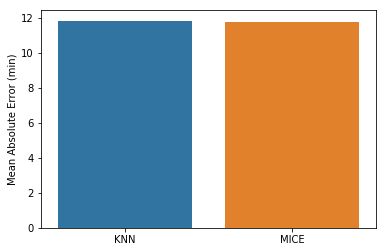

In [20]:
sns.barplot(y=MAE_gb, x=['KNN','MICE'])
plt.ylabel('Mean Absolute Error (min)')

Text(0,0.5,'Root Mean Square Error (min)')

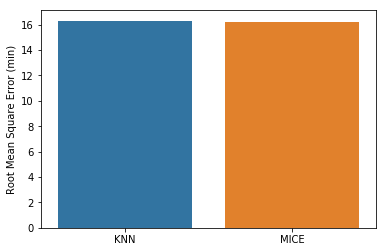

In [21]:
sns.barplot(y=RMSE_gb, x=['KNN','MICE'])
plt.ylabel('Root Mean Square Error (min)')

Text(0,0.5,'R2 Score')

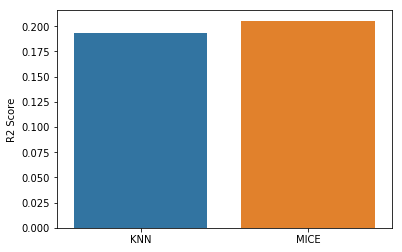

In [22]:
sns.barplot(y=r2_gb, x=['KNN','MICE'])
plt.ylabel('R2 Score')